<h1 style="text-align:center; font-weight:bold;">------------------- ML Project -------------------</h1>


<h1 style = "text-align:center"> Basics of natural language processing </h1>


<h1 style = "text-align:center"> Team name : WAH </h1>

### Team Member: 
    1) Oscar Wieland
    2) Gentrit Alija 
    3) Pablo Huber

---
<div style="text-align: center;">
    <h2>Summary</h2>
</div>

In order to improve its user's experience, programmer's best friend **Stackoverflow** has begun to process internal data from the past 15 years.
Unfortunately, some data are missing; the tag i.e. the subject of a post is nowhere to be found for some posts.
To help them, you are mandated as **machine learning** (ML) specialists.

Your task is to build the most accurate ML models for predicting the missing tag of a post.
In order to do so, Stackoverflow has provided you with a data set of posts and associated tags.
As ML specialists, your main challenge will be to process correctly these text data using **natural language processing** (NLP) methods.

---


## 1 - Data Loading and Exploration


### 1.1 - Load Packages & Data


In [1]:
# Import important packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # to make plots
%matplotlib inline

In [2]:
# Load the datasets
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

### 1.2 - Description and exploration of the Dataset


Dimension of the Dataset

In [3]:
# The Train Dataset is made of 28'000 rows and the 3 columns: Id, post and tag
data_train.shape

(28000, 3)

In [9]:
# The Test Dataset is made of 12 000 rows but this time the Tag column is not present
data_test.shape

(12000, 2)

First five rows of the training datasets

In [10]:
# Everything looks fine
data_train.head()

,Id,post,tags
0,1,what is causing this behavior in our c# datet...,c#
1,3,have dynamic html load as if it was in an ifra...,asp.net
2,4,how to convert a float value in to min:sec i ...,objective-c
3,5,.net framework 4 redistributable just wonderi...,.net
4,6,trying to calculate and print the mean and its...,python


In [11]:
# Everything looks fine
data_test.head()

,Id,post
0,2,have dynamic html load as if it was in an ifra...
1,12,how to install .ipa on jailbroken iphone over ...
2,13,dynamic textbox text - asp.net i m trying to ...
3,19,distance between 2 or more drop pins i was do...
4,22,clarification required on responsibility of $...


Checking for missing values


In [12]:
# No missing values
data_train.isnull().sum()     

Id      0
post    0
tags    0
dtype: int64

In [13]:
# No missing values
data_test.isnull().sum() 

Id      0
post    0
dtype: int64

Summary of the DataFrame
  
Checking data type of the columns


In [14]:
# The data types are coherent, post and tags column are of object type and will soon be converted to numerical format through Countvectorizer
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      28000 non-null  int64 
 1   post    28000 non-null  object
 2   tags    28000 non-null  object
dtypes: int64(1), object(2)
memory usage: 656.4+ KB


In [15]:
# The data types are coherent, post and tags column are of object type and will soon be converted to numerical format through Countvectorizer
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      12000 non-null  int64 
 1   post    12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


### 1.3 Class distribution of the dataset


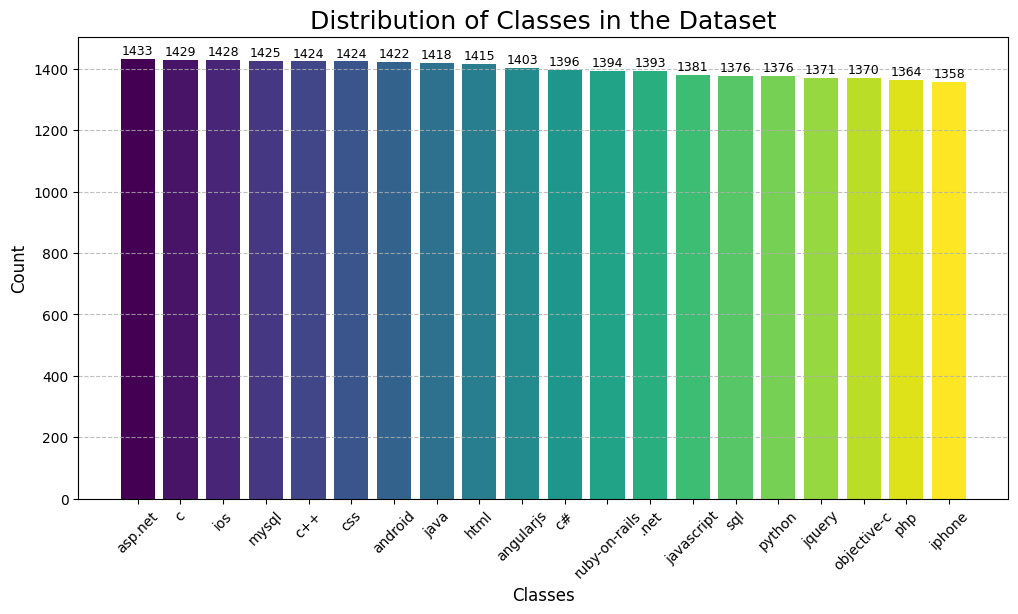

In [16]:
# Parameters for the figure size
plt.figure(figsize=(12, 6))

# Class counts
class_counts = data_train['tags'].value_counts()

# Colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(class_counts)))

# Bar plot
bars = plt.bar(class_counts.index, class_counts, color=colors)

# Add data labels on top of the bars
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(count), ha='center', va='bottom', fontsize = "9")

# Customize the grid, ticks, labels, and title
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tick_params(axis='x', rotation=45)
plt.title('Distribution of Classes in the Dataset',fontsize="18")
plt.xlabel('Classes', fontsize="12")
plt.ylabel('Count', fontsize="12")

# Show the plot
plt.show()

As we can see the distribution of the classes are well balanced, this will be useful for parameter selection later on.


---


## 2 - Text Formatting 

In light of employing two distinct text formatting styles (the basic and an enhanced version), we have dedicated this section for your convenience. Simply execute the relevant version based on your preference—Version 1 for the basic format and Version 2 for the improved format.

### 2.1 -  basic text formatting (V1)


This section covers the steps for formatting the text data from Stack Overflow to prepare it for machine learning modeling.


#### 2.1.1 - Import libraries required for text processing


In [4]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 


#### 2.1.2 - Processing the Data
For more details go to section "4.2.1 Enhancing text formatting" of the report


Setting Up Regular Expressions and Stopwords 


In [5]:
replace_space = re.compile('[/(){}\[\]\|@,;]')    # Compile regex pattern to replace certain punctuation and symbols with space
bad_symbols = re.compile('[^0-9a-z #+_]')         # Compile regex pattern to remove non-alphanumeric characters 
stopwords = set(stopwords.words('english'))       # Use a set of English stopwords that will be removed 


Define Preprocessing Function 


In [6]:
# function to formatting the text 
def preprocess_text(text):  
    text = BeautifulSoup(text, "lxml").text                                   # HTML decoding
    text = text.lower()                                                       # Transform all uppercase letters to lower case
    text = replace_space.sub(' ', text)                                       # Replace elements in replace_space symbols by a space 
    text = bad_symbols.sub('', text)                                          # Delete symbols selected in the bad_symbols list                                     
    text = ' '.join(word for word in text.split() if word not in stopwords)   # Delete stopwords from text
    return text

Verify Preprocessing


In [8]:
data_train["post"] = data_train["post"].apply(preprocess_text)  

# Print the first preprocessed post and its associated tag for verification
print(data_train["post"][0])
print(data_train["tags"][0])

# Works just fine  
data_train["post"].head()    

causing behavior c# datetime type test public void sadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring failed expected 20111031 061244000 20111031 061244350 wish know happening behind scenes tostring etc cause behavior edit seeing jon answer test public void newsadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostring result expected 20111031 120304161 20111031 063304161 result capital small reading docs still unclear
c#


0    causing behavior c# datetime type test public ...
1    dynamic html load iframe aspnet 40 site users ...
2    convert float value minsec trying convert seco...
3    net framework 4 redistributable wondering get ...
4    trying calculate print mean returning rather n...
Name: post, dtype: object

### 2.2 - Enhanced text formatting (V2)

#### 2.2.1 - Custom Stop word list
 
We decided to combine the stop word list of countVectorizer and of the nltk package as they both increased our result. We also added custom word to try to optimize it but without sucess.

Details on section: 4.2.1 Enhancing text formatting

In [3]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

set_count=CountVectorizer(stop_words="english").get_stop_words()
set_processing=set(stopwords.words('english'))  

unique_to_set_count = [word for word in set_count if word not in set_processing]
unique_to_set_processing = [word for word in set_processing if word not in set_count]

stop_words = unique_to_set_count+unique_to_set_processing

print("Words unique to list1:", len(unique_to_set_count),unique_to_set_count)
print("Words unique to list2:", len(unique_to_set_processing),unique_to_set_processing)


Words unique to list1: 199 ['part', 'amoungst', 'mine', 'although', 'inc', 'else', 'third', 'whenever', 'become', 'whence', 'least', 'fill', 'everything', 'neither', 'even', 'detail', 'fire', 'herein', 'couldnt', 'never', 'co', 'whereupon', 'back', 'something', 'alone', 'first', 'amongst', 'whereby', 'another', 'cry', 'someone', 'take', 'seem', 'go', 'whereafter', 'thereafter', 'rather', 'hereby', 'within', 'nevertheless', 'bill', 'one', 'may', 'get', 'find', 'together', 'fifteen', 'sixty', 'keep', 'eg', 'sometime', 'us', 'former', 'anyway', 'without', 'thru', 'yet', 'whereas', 'namely', 'since', 'elsewhere', 'empty', 'hereupon', 'twelve', 'show', 'please', 'front', 'per', 'six', 'done', 'de', 'next', 'somehow', 'system', 'along', 'anything', 'others', 'three', 'cant', 'whatever', 'nine', 'might', 'less', 'top', 'would', 'perhaps', 'could', 'upon', 'full', 'well', 'nowhere', 'besides', 'serious', 'thick', 'around', 'indeed', 'among', 'hundred', 'four', 'many', 'whose', 'either', 'moreo

#### 2.2.2 - Processing the Data

In [4]:
# Library for text formatting
import nltk
import re

replace_space = re.compile('[/(){}\[\]\|@, \\\ ;]')
bad_symbols = re.compile('[^0-9a-z [.][-]#+_]')


# function to formatting the text
def preprocess_text(text):  

    text = replace_space.sub(' ', text)
    text = bad_symbols.sub('', text) 

    text = ' '.join(word for word in text.split() if word not in stop_words)   
    return text

Verify Preprocessing

In [5]:
# be careful run this twice
data_train["post"] = data_train["post"].apply(preprocess_text)  

# Print the first preprocessed post and its associated tag for verification
print(data_train["post"][0])
print(data_train["tags"][0])

# Works just fine  
data_train["post"].head()    

what is causing this behavior in our c# datetime type <pre><code> test public void sadness var datetime = datetime.utcnow assert.that datetime is.equalto datetime.parse datetime.tostring < code>< pre> failed : <pre><code> expected: 2011-10-31 06:12:44.000 but was: 2011-10-31 06:12:44.350 < code>< pre> i wish to know what is happening the scenes in tostring to cause this behavior. edit after seeing jon answer : <pre><code> test public void newsadness var datetime = datetime.utcnow assert.that datetime is.equalto datetime.parse datetime.tostring < code>< pre> result : <pre><code>expected: 2011-10-31 12:03:04.161 but was: 2011-10-31 06:33:04.161 < code>< pre> same result with capital and small . i reading up the docs but unclear.
c#


0    what is causing this behavior in our c# dateti...
1    have dynamic html load as if it was in an ifra...
2    how to convert a float value in to min:sec i t...
3    .net framework 4 redistributable wondering whe...
4    trying to calculate and print the mean and its...
Name: post, dtype: object

### 2.3 - Vectorization of Text Data

Transform text documents into numerical feature vectors suitable for machine learning models. (EXAMPLE)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["this is an example and this example is for a machine learning project",
        "this is another example"]

count_vect = CountVectorizer()                                                     # Initialize CountVectorizer                                  
count_example = count_vect.fit_transform(text)                                     # Transform the text to a frequency count matrix
count_array = count_example.toarray()                                              # Convert the matrix to an array
df = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())   # Transform the results to a pandas data frame

print(df)

   an  and  another  example  for  is  learning  machine  project  this
0   1    1        0        2    1   2         1        1        1     2
1   0    0        1        1    0   1         0        0        0     1


### 2.4 Words distribution in tags

#### WordCloud

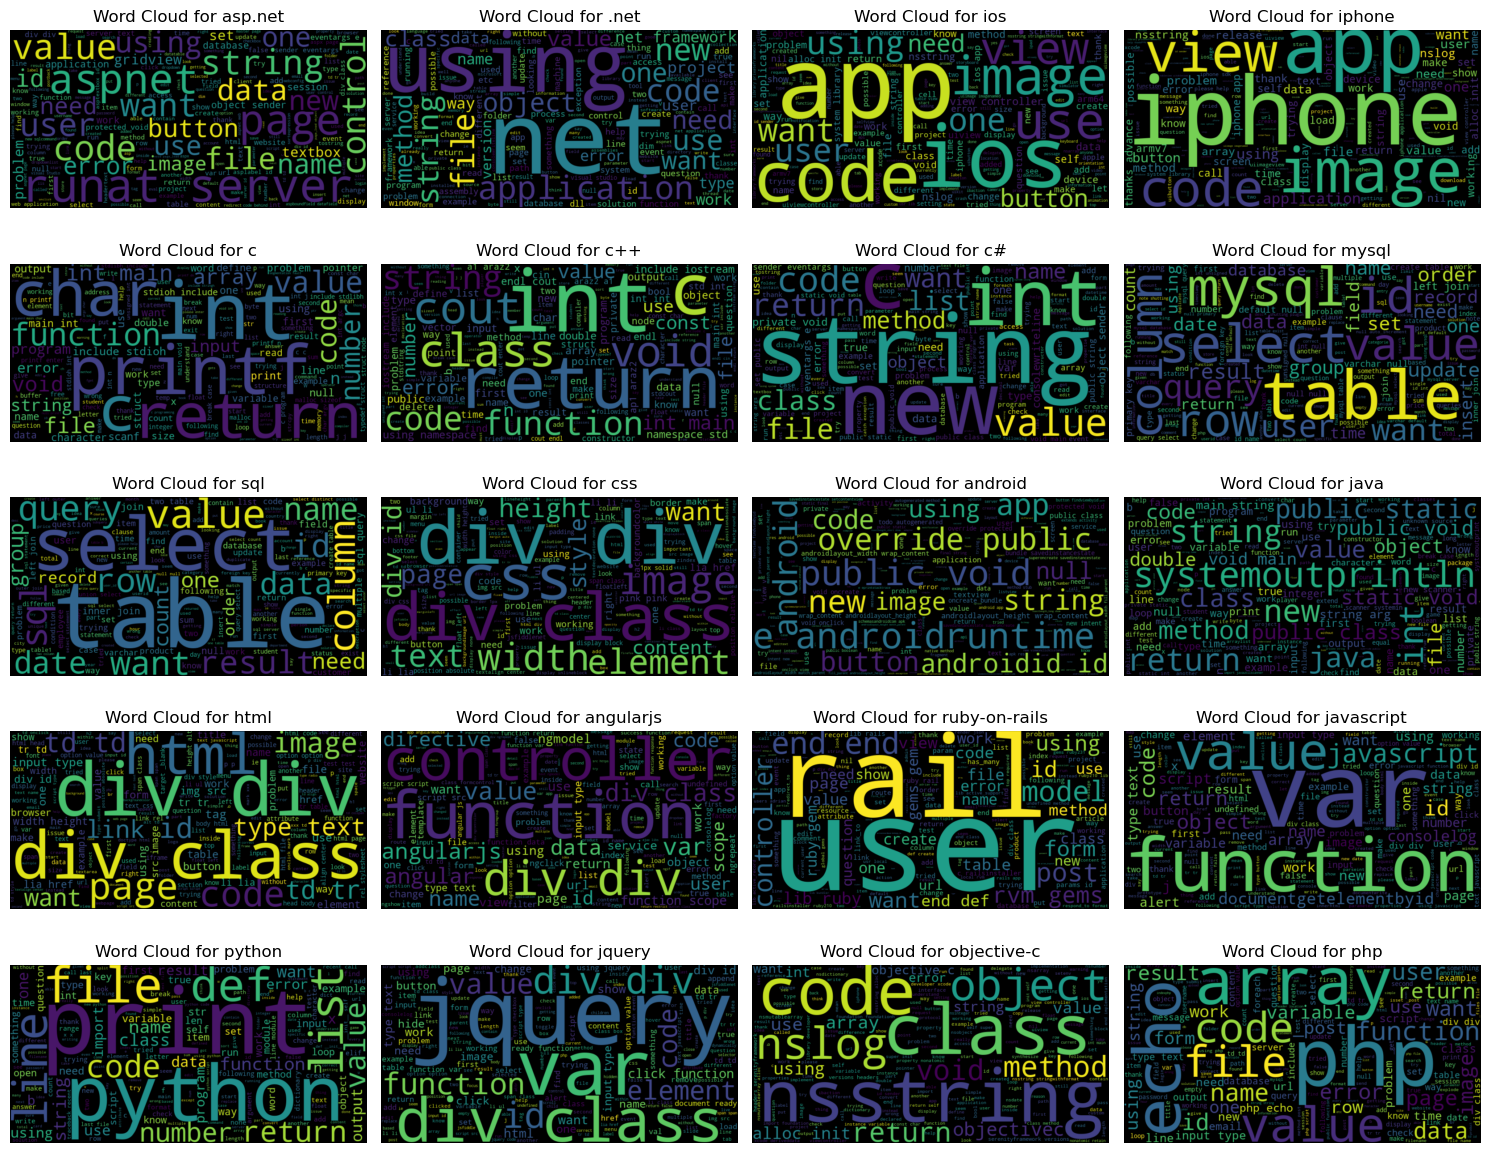

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of the tags
tags = ["asp.net", ".net", "ios", "iphone", "c", "c++", "c#", "mysql", "sql", "css", "android", "java", "html", "angularjs", "ruby-on-rails", "javascript", "python", "jquery", "objective-c", "php"]

# Set the number of rows and columns for the subplot grid
num_rows = 4  
num_cols = 4

# Calculate the total number of subplots needed
num_subplots = len(tags)

# Calculate the number of subplots in the last row
num_last_row = num_subplots % num_cols

# Calculate the number of rows needed
num_full_rows = num_subplots // num_cols
num_rows_needed = num_full_rows + (1 if num_last_row > 0 else 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows_needed, num_cols, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over tags and create a subplot for each
for i, tag in enumerate(tags):
    
    # Filter the dataset for the current tag
    tag_data = data_train[data_train['tags'] == tag]
    
    # Consolidate words for the current tag
    consolidated = ' '.join(word for word in tag_data['post'].astype(str))
    
    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(consolidated)
    
    # Plot the WordCloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Word Cloud for {tag}")

# Remove empty subplots in the last row
if num_last_row > 0:
    for i in range(num_last_row, num_cols):
        fig.delaxes(axes[-i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### 2.5 analysis of 3 tags

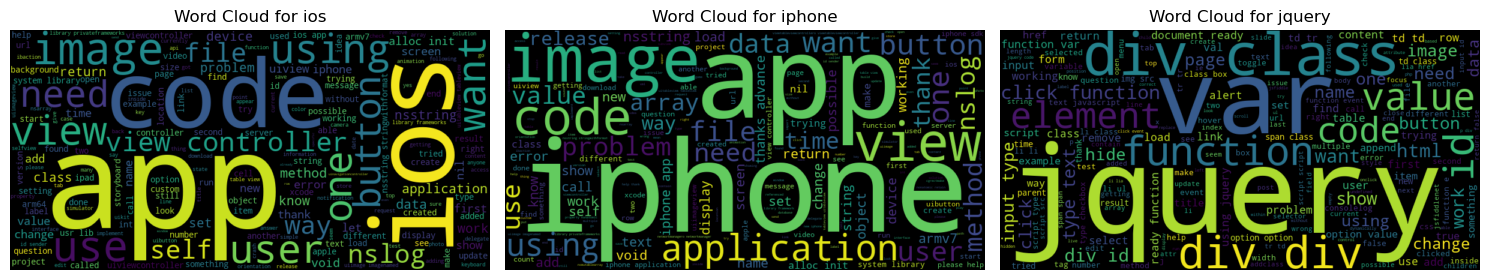

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of the tags
tags = [ "ios", "iphone", "jquery"]

# Set the number of rows and columns for the subplot grid
num_rows = 1  
num_cols = 3

# Calculate the total number of subplots needed
num_subplots = len(tags)

# Calculate the number of subplots in the last row
num_last_row = num_subplots % num_cols

# Calculate the number of rows needed
num_full_rows = num_subplots // num_cols
num_rows_needed = num_full_rows + (1 if num_last_row > 0 else 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows_needed, num_cols, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over tags and create a subplot for each
for i, tag in enumerate(tags):
    
    # Filter the dataset for the current tag
    tag_data = data_train[data_train['tags'] == tag]
    
    # Consolidate words for the current tag
    consolidated = ' '.join(word for word in tag_data['post'].astype(str))
    
    # Create WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(consolidated)
    
    # Plot the WordCloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Word Cloud for {tag}")

# Remove empty subplots in the last row
if num_last_row > 0:
    for i in range(num_last_row, num_cols):
        fig.delaxes(axes[-i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

---


## 3 - Model Selection 

### 3.1 Packages

In [6]:
# Text processing
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

# Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB,MultinomialNB

# Pipeline and score
from sklearn.pipeline import Pipeline # For automation and Readability
from sklearn.metrics import accuracy_score # To compare the accuracy

### 3.2 - Splitting Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(data_train["post"], data_train["tags"], test_size = 0.3,random_state=42, stratify=data_train["tags"])
# As our training set for the Kaggle competition is almost balanced, we want to keep this trend after we split the data and thus we specify stratify = data_train["tags"], 
# as it ensure that the train and test split is made of equaly balance classes.

### 3.3 Comparing the models

To make a "fair" comparison, we will choose features adapted to a sparse matrix in the context of a multinomialal text classification. 
This approach is encourage in the sickit-learn library for multinomialal text classification.

In [50]:
from time import time # time need to be imported each time we launch again this code idk why

# 3 min if no parameters in count_vectorizer

# Lists to store results
model_names = []
train_times = []
test_times = []
accuracy_test = []
accuracy_train = []

# List of the models that will be compared
regression_models = [
    (LinearSVC(class_weight="balanced", dual="auto", max_iter=10000), "Linear SVC"),
    (LogisticRegression(C=5, max_iter=10000, solver="sag", n_jobs=-1), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100, n_jobs=-1), "kNN"),
    (RandomForestClassifier(n_jobs=-1), "Random Forest"),
    (MultinomialNB(), "Naive Bayes")
]

for model, model_name in regression_models:

    # Define the pipeline for each model
    pipeline = Pipeline([
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("tfid", TfidfTransformer()),
        (model_name, model)
    ])
    
    t0 = time()

    # Fit the model
    pipeline.fit(X_train, y_train)
    train_time = time() - t0 
    print("=" * 50)
    print(f"Training time ({model_name}): {train_time:.3f}s")

    t0 = time()
    
    # Prediction of X_test
    pred_test = pipeline.predict(X_test)
    test_time = time() - t0
    print(f"Testing time on test ({model_name}): {test_time:.3f}s")

    # Prediction of X_train
    pred_train = pipeline.predict(X_train)
    test_time = time() - t0
    print(f"Testing time on training ({model_name}): {test_time:.3f}s")
    accuracy_test_score = accuracy_score(y_test, pred_test)
    print(f"Test score ({model_name}): {accuracy_test_score:.3f}")
   

    accuracy_train_score = accuracy_score(y_train, pred_train)
    print(f"Train score ({model_name}): {accuracy_train_score:.3f}")
    print("=" * 50)

    #Save results
    model_names.append(model_name)
    train_times.append(train_time)
    test_times.append(test_time)
    accuracy_test.append(accuracy_test_score)
    accuracy_train.append(accuracy_train_score)

# Create tot_time list to take into account training and test time
tot_time = []
for t_train, t_test in zip(train_times, test_times):
    tot_time.append(t_train + t_test) #v1

Training time (Linear SVC): 18.150s
Testing time on test (Linear SVC): 2.343s
Testing time on training (Linear SVC): 7.309s
Test score (Linear SVC): 0.808
Train score (Linear SVC): 1.000
Training time (Logistic Regression): 26.850s
Testing time on test (Logistic Regression): 1.458s
Testing time on training (Logistic Regression): 4.606s
Test score (Logistic Regression): 0.800
Train score (Logistic Regression): 0.998
Training time (kNN): 5.839s
Testing time on test (kNN): 217.699s


In [ ]:
# Plotting the results

# Plot training time with log scale and rotated labels
plt.figure(figsize=(12, 7))
scatter = plt.scatter(accuracy_test, tot_time, c=accuracy_test, cmap='viridis_r')

plt.title('Training + testing Time vs Test Accuracy')
plt.ylabel('Time in seconds')
plt.xlabel("Test Accuracy")

#As the values change each run, the lim is based on tot time of Random forest which is the longest model to run
plt.ylim(-30, int(tot_time[3]+30)) 


# Add model names next to the points
for acc, time, name in zip(accuracy_test, tot_time, model_names):
    plt.text(acc, time + 9, name, color='black', alpha=0.8, horizontalalignment="center")

plt.show()

---


## 4 - Logistic Regression Classifier

This section is dedicated to training a Logistic Regression classifier. Logistic Regression is a robust statistical method that can predict a binary outcome from a set of independent variables. It is also capable of handling multiclass classification problems.


### 4.1 Importing Required Libraries

We start by importing the necessary libraries for Logistic Regression and text vectorization.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 

### 4.2 Building the Logistic Regression Pipeline

We create a pipeline that includes both CountVectorizer for text data conversion into vector form and Logistic Regression for the classification task.


In [10]:
# Initialize the Logistic Regression pipeline
logit_regr_pipeline = Pipeline([
    ("vect", CountVectorizer()),  # Convert text into a matrix of token counts
    ("logit", LogisticRegression(multi_class="multinomial", solver = "sag", max_iter=1000, random_state=42))])

### 4.3 Training the Logistic Regression Model

We train the Logistic Regression model using the training data.


In [11]:
# Train the model
logit_regr_pipeline.fit(X_train, y_train) # 2 min 13, 1min59

### 4.4 Model Evaluation

After training, we will evaluate our model's performance on the training and test datasets.


In [34]:
# Calculate the accuracy on the training data
training_accuracy_logit = logit_regr_pipeline.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy_logit}")

# Calculate the accuracy on the test data
test_accuracy_logit = logit_regr_pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy_logit}")

Training Accuracy: 0.9126530612244897
Test Accuracy: 0.7810714285714285


Based on the results for the Logistic Regression Classifier:

- Training Accuracy: Approximately 91.27%. This indicates the proportion of correct predictions the model made on the dataset it was trained on.
- Test Accuracy: Approximately 78.11%. This reflects the model's ability to correctly predict the tags on new, unseen data.

These results are quite balanced, which is a good sign. The test accuracy is slightly higher than the training accuracy, suggesting that the model generalizes well and is not overfitting to the training data. It's somewhat unusual for the test accuracy to be higher, but this can happen, especially if the test set happens to be slightly "easier" for the model or due to the randomness in the way the train/test split was made.


### 4.5 Logistic with TF-IDF and C=7.5 (SELECTED FOR KAGGEL COMPETITION WITH TEXT FORMATTING (V2))

In [ ]:
# Create a pipeline with CountVectorizer and TfidfTransformer
logit_tf_regr = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm='l2')),
    ("logit", LogisticRegression(multi_class="multinomial",C=7.5,class_weight='balanced', penalty='l2',tol=0.000000001, solver="sag", max_iter=10000,random_state=42))
])

# Fit the pipeline on the training data
logit_tf_regr.fit(X_train, y_train)

# Predict pipeline to training data
y_train_pred = logit_tf_regr.predict(X_train)
acc = accuracy_score(y_train, y_train_pred)
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = logit_tf_regr.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Logistic --- Accuracy on test:", acc_test)

### 4.6 Grid Search

#### 4.6.1 Grid Search (sag and saga with l2 penalty fixed)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 


# Create a pipeline with CountVectorizer and TfidfTransformer
logit_tf_regr = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True)),
    ("logit", LogisticRegression(multi_class="auto", class_weight='balanced', penalty='l2', tol=0.000000001, max_iter=100000, random_state=42 ))
])


# Define the parameter grid
param_grid = {
    "tfid__norm": ("l1","l2"),
    "logit__C": range(1, 20, 3), 
    "logit__tol": (1e-6,1e-7,1e-8),
    "logit__solver": ("sag","saga")
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logit_tf_regr, param_grid, cv=5, n_jobs=-1, verbose=2,error_score="raise")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('tfid',
                                        TfidfTransformer(sublinear_tf=True)),
                                       ('logit',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=100000,
                                                           random_state=42,
                                                           solver='sag',
                                                           tol=1e-09))]),
             n_jobs=-1,
             param_grid={'logit__C': range(1, 20, 3),
                         'logit__solver': ('sag', 'saga'),
                         'logit__tol': (1e-06, 1e-07, 1e-08),
                         'tfid__norm': ('l1', 'l2')},
             verbose=2)

In [16]:
# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Save the result as a CSV file for later use
results_df.to_csv("grid_search_Logit_sag_l2.csv", index=False)

In [17]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('tfid', TfidfTransformer(sublinear_tf=True)),
                ('logit',
                 LogisticRegression(C=19, class_weight='balanced',
                                    max_iter=100000, random_state=42,
                                    solver='sag', tol=1e-06))])
0.8194897959183673
{'logit__C': 19, 'logit__solver': 'sag', 'logit__tol': 1e-06, 'tfid__norm': 'l2'}
73


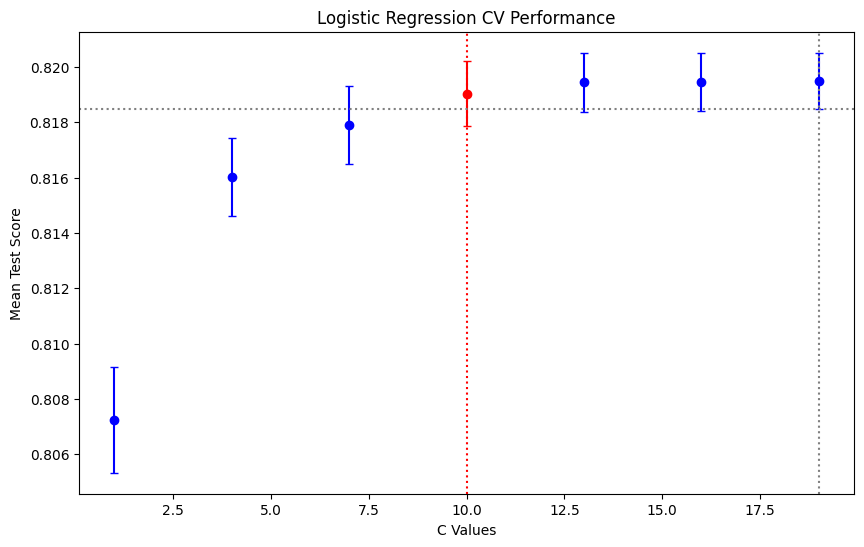

The C value selected by the one standard error rule is: 10


In [23]:
import matplotlib.pyplot as plt
results_Logit_sag_l2 = pd.read_csv("grid_search_Logit_sag_l2.csv")
results_Logit_sag_l2 = results_Logit_sag_l2[(results_Logit_sag_l2['param_tfid__norm'] == 'l2') & (results_Logit_sag_l2['param_logit__solver'] == 'sag')& (results_Logit_sag_l2['param_logit__tol'] == 1e-06)]

hyperparameter_values = results_Logit_sag_l2['param_logit__C'].values
mean_scores = results_Logit_sag_l2['mean_test_score'].values
std_scores = results_Logit_sag_l2['std_test_score'].values / np.sqrt(5)  # we need to divide by the Sqrt of the number of k-folds, in our case 5

# Best model index and values (highest score)
best_index = np.argmax(mean_scores)
best_hyperparam = hyperparameter_values[best_index]
best_score = mean_scores[best_index]
one_std_error = std_scores[best_index]

# Threshold for one standard error rule
score_threshold = best_score - one_std_error

# Find the simplest model within one standard deviation of the best score
# This is the largest C value that meets the criterion
selected_c_value = min(hyperparameter_values[mean_scores >= score_threshold])

# Plot
plt.figure(figsize=(10, 6))
for i in range(len(hyperparameter_values)):
    color = 'red' if hyperparameter_values[i] == selected_c_value else 'blue'
    plt.errorbar(x=hyperparameter_values[i], y=mean_scores[i], yerr=std_scores[i], fmt='o', capsize=3, color=color)

plt.axvline(best_hyperparam, ls='dotted', color="grey")  # Best hyperparameter
plt.axvline(selected_c_value, ls='dotted', color="red")  # Highlighted C value by the one standard error rule
plt.axhline(score_threshold, ls='dotted', color="grey")  # Threshold

plt.title("Logistic Regression CV Performance")
plt.xlabel('C Values')
plt.ylabel('Mean Test Score')
plt.show()

# Output the selected C value
print("The C value selected by the one standard error rule is:", selected_c_value)

### Logistic with TF-IDF and C=10 (SELECTED FOR KAGGEL COMPETITION WITH TEXT FORMATTING (V2))

In [ ]:
# Create a pipeline with CountVectorizer and TfidfTransformer
logit_tf_regr = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm='l2')),
    ("logit", LogisticRegression(multi_class="multinomial",C=10,class_weight='balanced', penalty='l2',tol=0.000000001, solver="sag", max_iter=10000,random_state=42))
])

# Fit the pipeline on the training data
logit_tf_regr.fit(X_train, y_train)

# Predict pipeline to training data
y_train_pred = logit_tf_regr.predict(X_train)
acc = accuracy_score(y_train, y_train_pred)
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = logit_tf_regr.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Logistic --- Accuracy on test:", acc_test)

##### confusion matrix

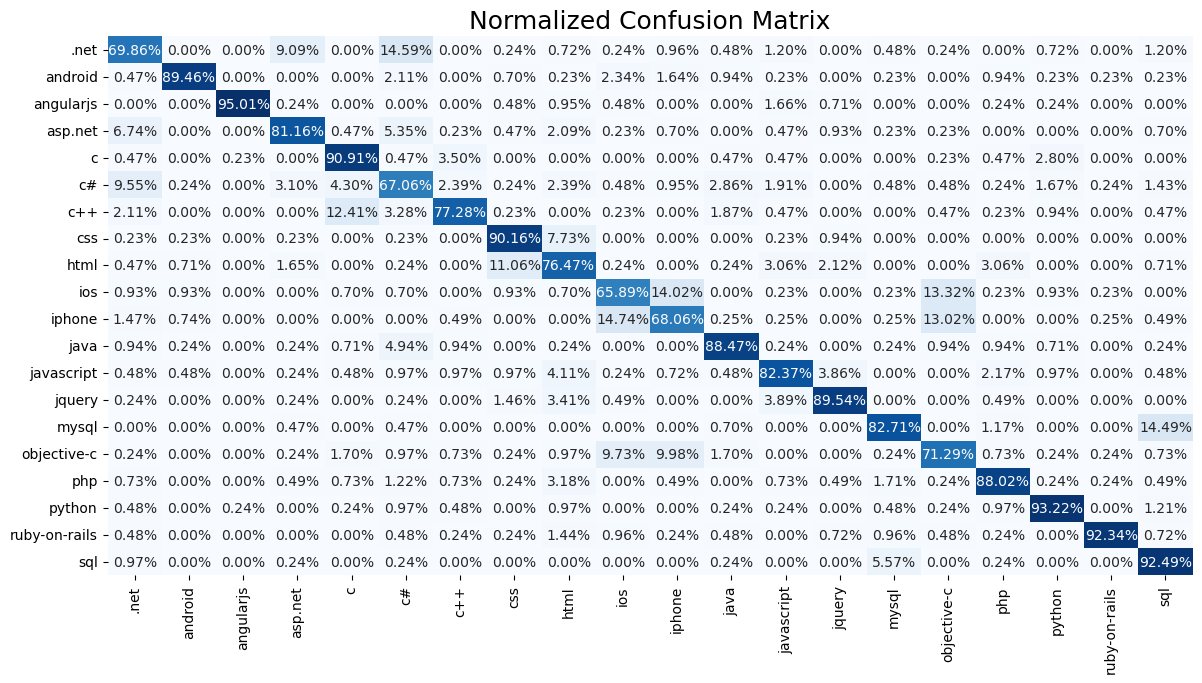

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

# Create a pipeline with CountVectorizer and TfidfTransformer
logit_tf_regr = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm='l2')),
    ("logit", LogisticRegression(multi_class="auto",C=10,class_weight='balanced', penalty='l2',tol=1e-06, solver="sag", max_iter=100000,random_state=42))
])

# Fit the pipeline on the training data
logit_tf_regr.fit(X_train, y_train)

# Predict pipeline to test data
y_test_pred = logit_tf_regr.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Normalize the confusion matrix
conf_matrix_normalized = normalize(conf_matrix, axis=1, norm='l1')  # Use 'l1' normalization for percentages

# Plot the normalized confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=sorted(np.unique(y_test)), yticklabels=sorted(np.unique(y_test)))
plt.title('Normalized Confusion Matrix', fontsize = 18)
plt.show()

##### Classification report

In [11]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
report = classification_report(y_test, y_test_pred)

print(report)

               precision    recall  f1-score   support

         .net       0.72      0.70      0.71       418
      android       0.96      0.89      0.93       427
    angularjs       1.00      0.95      0.97       421
      asp.net       0.83      0.81      0.82       430
            c       0.81      0.91      0.86       429
           c#       0.64      0.67      0.66       419
          c++       0.88      0.77      0.82       427
          css       0.84      0.90      0.87       427
         html       0.73      0.76      0.75       425
          ios       0.69      0.66      0.68       428
       iphone       0.69      0.68      0.68       407
         java       0.89      0.88      0.89       425
   javascript       0.84      0.82      0.83       414
       jquery       0.90      0.90      0.90       411
        mysql       0.89      0.83      0.86       428
  objective-c       0.70      0.71      0.71       411
          php       0.87      0.88      0.88       409
       py

#### 4.6.2 Grid Search (Saga Solver with l1 )

In [ ]:
# After waiting for 1'714 minutes we decided to stop the run

# Create a pipeline with CountVectorizer and TfidfTransformer
logit_tf_regr = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm="l2")),
    ("logit", LogisticRegression(multi_class="auto", class_weight='balanced', solver="saga", max_iter=100000, random_state=42 ))
])


# Define the parameter grid
param_grid = {
    
    "logit__C": range(1, 20, 3), 
    "logit__tol": (1e-6,1e-7,1e-8),
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logit_tf_regr, param_grid, cv=5, n_jobs=-1, verbose=2,error_score="raise")

# Fit the grid search to the data
grid_search.fit(X_train, y_train) # 105 fit only

---

## 5 - Linear SVC

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True)),
    ("svc", LinearSVC(class_weight="balanced", random_state=42))
]) 

# Fit the pipeline on the training data
svc_pipeline.fit(X_train, y_train)

# Predict pipeline on training data
y_train_pred = svc_pipeline.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print("Linear svc --- Accuracy on training:", acc_train)

# Predict pipeline on test data
y_test_pred = svc_pipeline.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Linear svc --- Accuracy on test:", acc_test)

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

### 5.1 Grid Search  1

In [ ]:

svc_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2))),
    ("tfid", TfidfTransformer(sublinear_tf=True)),
    ("svc", LinearSVC( penalty="l2", class_weight="balanced", random_state=42)) # l1 not supported by hinge
])

param_grid = {
    'tfid__norm': ['l1', 'l2'],
    'svc__C': range(1, 10, 2),
    'svc__loss': ['hinge', 'squared_hinge'],
    'svc__multi_class': ['ovr', 'crammer_singer'],
    'svc__max_iter': [1000, 10000],  # Example values, adjust as needed
    'svc__tol': [ 1e-4, 1e-5]  # Example values, adjust as needed
}

# Fit the pipeline on the training data
# Set up the grid search
grid_search = GridSearchCV(svc_pipeline, param_grid=param_grid,scoring='accuracy',n_jobs=-1, cv=5, verbose=2,error_score="raise")

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Save the result as a CSV file for later use
results_df.to_csv("grid_search_SVC.csv", index=False)

In [ ]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_index_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
results_df = pd.read_csv("grid_search_SVC.csv")

Results_squareHinge_ovr_l2 = results_df[(results_df['param_svc__loss'] == 'squared_hinge') & (results_df['param_svc__max_iter'] == 1000) &  (results_df['param_svc__multi_class'] == 'ovr')& (results_df['param_svc__tol'] == 0.0001)& (results_df['param_tfid__norm'] == 'l2')]


hyperparameter_values = Results_squareHinge_ovr_l2['param_svc__C'].values
mean_scores = Results_squareHinge_ovr_l2['mean_test_score'].values
std_scores = Results_squareHinge_ovr_l2['std_test_score'].values / np.sqrt(5)  # we need to divide by the Sqrt of the number of k-folds, in our case 5.

# Best model index and values (highest score)
best_index = np.argmax(mean_scores)
best_hyperparam = hyperparameter_values[best_index]
best_score = mean_scores[best_index]
one_std_error = std_scores[best_index]

# Threshold for one standard error rule
score_threshold = best_score - one_std_error

# Find the simplest model within one standard deviation of the best score
# This is the largest C value that meets the criterion
selected_c_value = min(hyperparameter_values[mean_scores >= score_threshold])

# Plot
plt.figure(figsize=(10, 6))
for i in range(len(hyperparameter_values)):
    color = 'red' if hyperparameter_values[i] == selected_c_value else 'blue'
    plt.errorbar(x=hyperparameter_values[i], y=mean_scores[i], yerr=std_scores[i], fmt='o', capsize=3, color=color)

plt.axvline(best_hyperparam, ls='dotted', color="grey")  # Best hyperparameter
plt.axvline(selected_c_value, ls='dotted', color="red")  # Highlighted C value by the one standard error rule
plt.axhline(score_threshold, ls='dotted', color="grey")  # Threshold

plt.title(" linear SVC CV Performance")
plt.xlabel('C Values')
plt.ylabel('Mean Test Score')
plt.show()

# Output the selected C value
print("The C value selected by the one standard error rule is:", selected_c_value)

### 5.2 grid search 2

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV

svc_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2))),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm="l2")),
    ("svc", LinearSVC( penalty="l2", class_weight="balanced", random_state=42, max_iter=1000, tol=0.0001)) # l1 not supported by ginge
])

param_grid = {
    'svc__C': [0.2,0.5,0.7,1,3],
    'svc__loss': ['hinge', 'squared_hinge'],
    'svc__multi_class': ['ovr', 'crammer_singer']
}

# Fit the pipeline on the training data
# Set up the grid search
grid_search = GridSearchCV(svc_pipeline, param_grid=param_grid,scoring='accuracy',n_jobs=-2, cv=5, verbose=2,error_score="raise")

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Save the result as a CSV file for later use
results_df.to_csv("grid_search_SVC.csv", index=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..svc__C=0.2, svc__loss=hinge, svc__multi_class=ovr; total time=  42.6s
[CV] END ..svc__C=0.2, svc__loss=hinge, svc__multi_class=ovr; total time=  43.1s
[CV] END ..svc__C=0.2, svc__loss=hinge, svc__multi_class=ovr; total time=  43.5s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..svc__C=0.2, svc__loss=hinge, svc__multi_class=ovr; total time=  34.5s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..svc__C=0.2, svc__loss=hinge, svc__multi_class=ovr; total time=  34.3s
[CV] END svc__C=0.2, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  35.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.2, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  39.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.2, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  44.2s
[CV] END svc__C=0.2, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  42.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.2, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  31.9s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  29.2s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  29.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  42.3s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  43.2s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  43.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/

[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  50.4s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  49.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  52.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/

[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  41.5s
[CV] END svc__C=0.2, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  41.0s
[CV] END ..svc__C=0.5, svc__loss=hinge, svc__multi_class=ovr; total time=  39.6s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..svc__C=0.5, svc__loss=hinge, svc__multi_class=ovr; total time=  44.0s
[CV] END ..svc__C=0.5, svc__loss=hinge, svc__multi_class=ovr; total time=  43.9s
[CV] END ..svc__C=0.5, svc__loss=hinge, svc__multi_class=ovr; total time=  43.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..svc__C=0.5, svc__loss=hinge, svc__multi_class=ovr; total time=  40.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  42.9s
[CV] END svc__C=0.5, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  41.9s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/

[CV] END svc__C=0.5, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  39.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  39.6s
[CV] END svc__C=0.5, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  40.9s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  29.2s
[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  29.6s
[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  30.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  39.1s
[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  39.5s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  42.3s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  38.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  39.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  42.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.5, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  37.3s
[CV] END ..svc__C=0.7, svc__loss=hinge, svc__multi_class=ovr; total time=  35.8s
[CV] END ..svc__C=0.7, svc__loss=hinge, svc__multi_class=ovr; total time=  33.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..svc__C=0.7, svc__loss=hinge, svc__multi_class=ovr; total time=  30.3s
[CV] END ..svc__C=0.7, svc__loss=hinge, svc__multi_class=ovr; total time=  31.0s
[CV] END ..svc__C=0.7, svc__loss=hinge, svc__multi_class=ovr; total time=  31.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  31.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  32.3s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  33.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  36.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  34.3s
[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  31.2s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  32.1s
[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  32.4s
[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  32.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  30.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  33.6s
[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  32.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  29.6s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  31.6s
[CV] END svc__C=0.7, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  31.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ....svc__C=1, svc__loss=hinge, svc__multi_class=ovr; total time=  37.7s
[CV] END ....svc__C=1, svc__loss=hinge, svc__multi_class=ovr; total time=  39.6s
[CV] END ....svc__C=1, svc__loss=hinge, svc__multi_class=ovr; total time=  40.3s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ....svc__C=1, svc__loss=hinge, svc__multi_class=ovr; total time=  57.8s
[CV] END ....svc__C=1, svc__loss=hinge, svc__multi_class=ovr; total time=  58.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=hinge, svc__multi_class=crammer_singer; total time= 1.0min


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  43.2s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  49.0s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  49.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  51.9s
[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  42.7s
[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  39.5s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  32.9s
[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  33.9s
[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  33.9s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  34.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  31.9s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  31.6s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  32.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=1, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  33.2s
[CV] END ....svc__C=3, svc__loss=hinge, svc__multi_class=ovr; total time=  34.9s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ....svc__C=3, svc__loss=hinge, svc__multi_class=ovr; total time=  49.7s
[CV] END ....svc__C=3, svc__loss=hinge, svc__multi_class=ovr; total time=  51.0s
[CV] END ....svc__C=3, svc__loss=hinge, svc__multi_class=ovr; total time=  51.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ....svc__C=3, svc__loss=hinge, svc__multi_class=ovr; total time=  44.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  48.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  48.7s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  56.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  52.6s
[CV] END svc__C=3, svc__loss=hinge, svc__multi_class=crammer_singer; total time=  48.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  41.1s
[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  42.9s
[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  42.2s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  36.9s
[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=ovr; total time=  37.8s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  39.5s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  48.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  49.6s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  50.1s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END svc__C=3, svc__loss=squared_hinge, svc__multi_class=crammer_singer; total time=  31.4s


/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [14]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfid', TfidfTransformer(sublinear_tf=True)),
                ('svc',
                 LinearSVC(C=0.5, class_weight='balanced', random_state=42))])
0.8288265306122448
{'svc__C': 0.5, 'svc__loss': 'squared_hinge', 'svc__multi_class': 'ovr'}


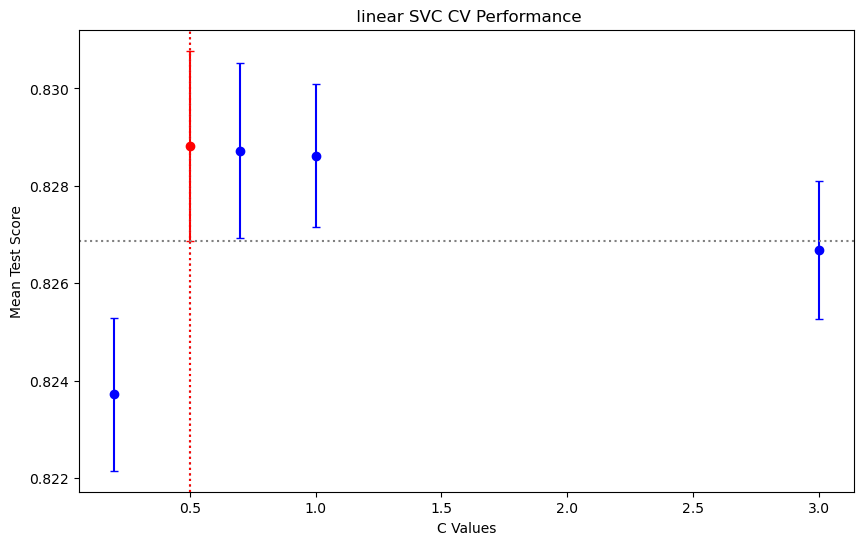

The C value selected by the one standard error rule is: 0.5


In [16]:
import numpy as np
import matplotlib.pyplot as plt
results_df = pd.read_csv("grid_search_SVC.csv")

Results_squareHinge_ovr_l2 = results_df[(results_df['param_svc__loss'] == 'squared_hinge')& (results_df['param_svc__multi_class'] == 'ovr')]


hyperparameter_values = Results_squareHinge_ovr_l2['param_svc__C'].values
mean_scores = Results_squareHinge_ovr_l2['mean_test_score'].values
std_scores = Results_squareHinge_ovr_l2['std_test_score'].values / np.sqrt(5)  # we need to divide by the Sqrt of the number of k-folds, in our case 5.

# Best model index and values (highest score)
best_index = np.argmax(mean_scores)
best_hyperparam = hyperparameter_values[best_index]
best_score = mean_scores[best_index]
one_std_error = std_scores[best_index]

# Threshold for one standard error rule
score_threshold = best_score - one_std_error

# Find the simplest model within one standard deviation of the best score
# This is the largest C value that meets the criterion
selected_c_value = min(hyperparameter_values[mean_scores >= score_threshold])

# Plot
plt.figure(figsize=(10, 6))
for i in range(len(hyperparameter_values)):
    color = 'red' if hyperparameter_values[i] == selected_c_value else 'blue'
    plt.errorbar(x=hyperparameter_values[i], y=mean_scores[i], yerr=std_scores[i], fmt='o', capsize=3, color=color)

plt.axvline(best_hyperparam, ls='dotted', color="grey")  # Best hyperparameter
plt.axvline(selected_c_value, ls='dotted', color="red")  # Highlighted C value by the one standard error rule
plt.axhline(score_threshold, ls='dotted', color="grey")  # Threshold

plt.title(" linear SVC CV Performance")
plt.xlabel('C Values')
plt.ylabel('Mean Test Score')
plt.show()

# Output the selected C value
print("The C value selected by the one standard error rule is:", selected_c_value)

### 5.3 Linear SVC grid-search

In [13]:

svc_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 2), stop_words='english')),
    ("tfid", TfidfTransformer(sublinear_tf=True, norm="l2")),
    ("svc", LinearSVC(C=0.5,class_weight="balanced", random_state=42, max_iter=1000, tol=0.0001, loss="squared_hinge", multi_class="ovr"))
]) 

# Fit the pipeline on the training data
svc_pipeline.fit(X_train, y_train)

# Predict pipeline on training data
y_train_pred = svc_pipeline.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print("Linear svc --- Accuracy on training:", acc_train)

# Predict pipeline on test data
y_test_pred = svc_pipeline.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Linear svc --- Accuracy on test:", acc_test)



/Users/oscarwieland/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear svc --- Accuracy on training: 0.9985204081632653
Linear svc --- Accuracy on test: 0.8344047619047619


##### Confusion matrix

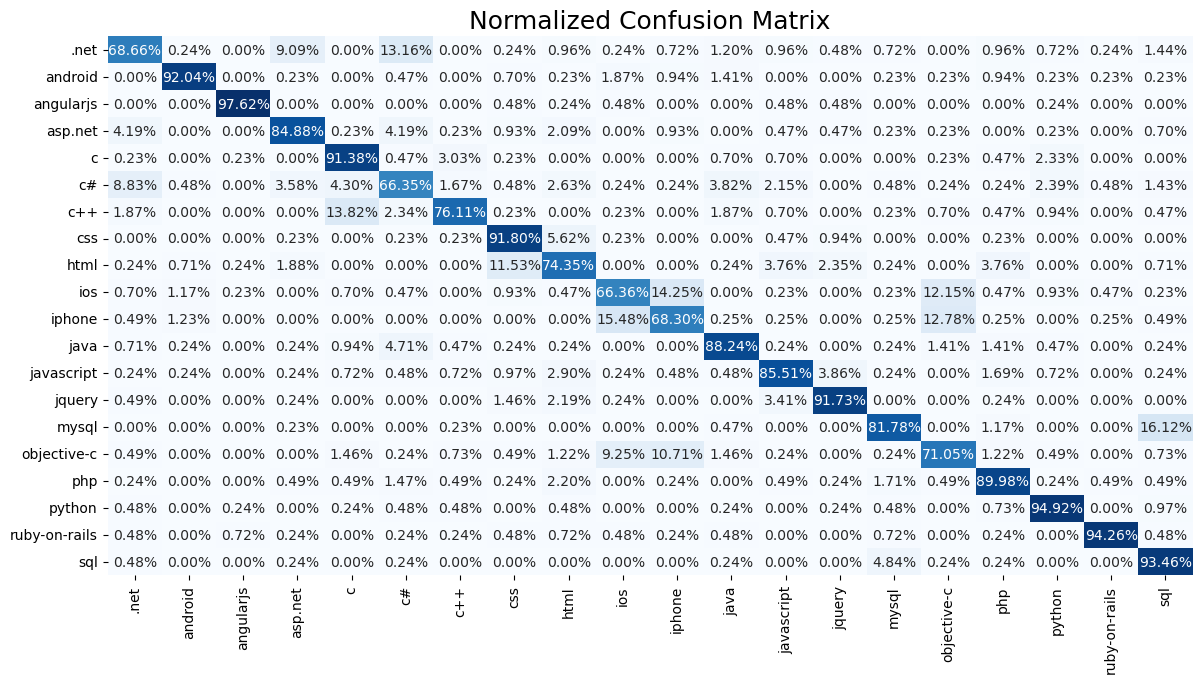

In [14]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Normalize the confusion matrix
conf_matrix_normalized = normalize(conf_matrix, axis=1, norm='l1')  # Use 'l1' normalization for percentages

# Plot the normalized confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=sorted(np.unique(y_test)), yticklabels=sorted(np.unique(y_test)))
plt.title('Normalized Confusion Matrix', fontsize = 18)
plt.show()

##### classification report

In [15]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
report = classification_report(y_test, y_test_pred)

print(report)

               precision    recall  f1-score   support

         .net       0.77      0.69      0.73       418
      android       0.96      0.92      0.94       427
    angularjs       0.98      0.98      0.98       421
      asp.net       0.84      0.85      0.84       430
            c       0.80      0.91      0.85       429
           c#       0.69      0.66      0.68       419
          c++       0.90      0.76      0.82       427
          css       0.83      0.92      0.87       427
         html       0.77      0.74      0.76       425
          ios       0.70      0.66      0.68       428
       iphone       0.70      0.68      0.69       407
         java       0.87      0.88      0.88       425
   javascript       0.85      0.86      0.85       414
       jquery       0.91      0.92      0.91       411
        mysql       0.88      0.82      0.85       428
  objective-c       0.71      0.71      0.71       411
          php       0.86      0.90      0.88       409
       py

## 6 - Report tables and more

### 6.1 - Top 3 words for jquery

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample_index = 0 # Index of the Trainning Dataset
sample_text = Train["post"].iloc[sample_index]
true_label = Train["tags"].iloc[sample_index]

# Prediction of a Training sample
predicted_label = logit_tf_regr.predict([sample_text])[0]

# Get the feature names, coefficients of the Logistic Regression model and class labels.
feature_names = logit_tf_regr.named_steps['vect'].get_feature_names_out()
coefficients = logit_tf_regr.named_steps['logit'].coef_
class_labels = logit_tf_regr.named_steps['logit'].classes_

# Find the index of the predicted class label
class_index = np.where(class_labels == predicted_label)[0][0]
class_coef = coefficients[class_index]

# Map coefficients to feature names
feature_importance = zip(feature_names, class_coef)
sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)


print("True label:", true_label)
print("Predicted label:", predicted_label)
print(" The 7 most impacting words of our sample to assign the class jquery on our sample'{}':".format(predicted_label))

for word, coef in sorted_features[:7]:  # top 7 features
    print(word, coef)
df_features = pd.DataFrame(sorted_features, columns=['Feature', 'Coefficient'])

# Table numero .... report
#top_features = df_features.head(7)
#latex_table = top_features.to_latex(index=False)
#print(latex_table)

In [ ]:
# Table numero .... report

# Sample data from the user's output
data = {
    "Word": ["jquery", "function", "var", "click function", "using jquery", 
             "click", "div", "in jquery", "attr", "val"],
    "Coefficient": [31.255074440388043, 12.060685265342777, 7.6126857392811145, 
                    6.337272060735379, 6.307180274367622, 6.19803867646987, 
                    5.2199197201040155, 4.924086475561976, 4.705519540872214, 4.67713707473371]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df['Word'], df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.title('Top Words Contributing to Predicted Label "jquery"')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()